In [1]:
from google.colab import files
uploaded=files.upload()

Saving Lipophilicity.csv to Lipophilicity.csv


In [2]:
import pandas as pd

# Enter the correct file name (Check auto-generated name!)
df = pd.read_csv("Lipophilicity.csv")

# Check the top 5 rows
df.head()


,SMILES,Lipophilicity
0,Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1,4.11
1,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59
4,C#CCC(C(=O)N=C(Cc1cc[nH]c1O)CCC(O)OCC)n1cccc(N...,1.75


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 37.9 MB/s eta 0:00:00


In [4]:
from rdkit import Chem

# Convert SMILES to Mol objects
df["Mol"] = df["SMILES"].apply(Chem.MolFromSmiles)


[12:27:45] Explicit valence for atom # 5 P, 7, is greater than permitted
[12:27:45] Explicit valence for atom # 29 P, 7, is greater than permitted


In [5]:
def compute_descriptors(mol):
    # If SMILES is invalid and the Mol object cannot be created (None),
    # Return all features as None to prevent errors
    if mol is None:
        return pd.Series({
            "MolWt": None,                # Molecular weight
            "TPSA": None,                 # Topological Polar Surface Area
            "NumHDonors": None,           # Number of hydrogen bond donors
            "NumHAcceptors": None,        # Number of hydrogen bond acceptors
            "NumRotatableBonds": None,    # Number of rotatable bonds
            "RingCount": None,            # Number of rings
            "AromaticProportion": None    # Proportion of aromatic atoms
        })

   # If the Mol object is successfully created, calculate features using RDKit
    return pd.Series({
    "MolWt": Descriptors.MolWt(mol),                              # Calculate molecular weight
    "TPSA": rdMolDescriptors.CalcTPSA(mol),                       # Calculate topological polar surface area (TPSA)
    "NumHDonors": rdMolDescriptors.CalcNumHBD(mol),              # Calculate number of H-bond donors
    "NumHAcceptors": rdMolDescriptors.CalcNumHBA(mol),           # Calculate number of H-bond acceptors
    "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),     # Calculate number of rotatable bonds
    "RingCount": rdMolDescriptors.CalcNumRings(mol),             # Calculate number of rings
    "AromaticProportion": len([atom for atom in mol.GetAromaticAtoms()]) / mol.GetNumAtoms()    # Proportion of aromatic atoms = number of aromatic atoms / total number of atoms
})

In [6]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

# Apply the compute_descriptors function to all molecules (Mol objects) in df["Mol"]
# The result is stored in a new DataFrame called descriptor_df, with each molecular feature as a column
descriptor_df = df["Mol"].apply(compute_descriptors)

In [7]:
# Concatenate the original df and the computed descriptor_df side by side (axis=1)
# The resulting df_full includes SMILES, logP, Mol objects, and all molecular descriptors
df_full = pd.concat([df, descriptor_df], axis=1)

In [8]:
# Display the first 5 rows of df_full to verify that the descriptors were calculated correctly
df_full.head()

,SMILES,Lipophilicity,Mol,MolWt,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,RingCount,AromaticProportion
0,Brc1c[nH]c(=NCc2ccccc2)nc1N=c1cc(C2CC2)[nH][nH]1,4.11,<rdkit.Chem.rdchem.Mol object at 0x7a869c8ff3e0>,385.269,84.98,3.0,3.0,4.0,4.0,0.708333
1,Brc1cc(Br)cc(COC[C@H](c2ccccc2)N2CCNCC2)c1,2.80,<rdkit.Chem.rdchem.Mol object at 0x7a86ea495e70>,454.206,24.50,1.0,3.0,6.0,3.0,0.500000
2,C#CC(C)(C)NC(=O)c1sccc1Oc1ccc(F)cc1[N+](=O)[O-],3.00,<rdkit.Chem.rdchem.Mol object at 0x7a869c6f0190>,348.355,81.47,1.0,5.0,5.0,2.0,0.458333
3,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,3.59,<rdkit.Chem.rdchem.Mol object at 0x7a869c6f03c0>,513.989,92.53,0.0,9.0,6.0,6.0,0.648649
4,C#CCC(C(=O)N=C(Cc1cc[nH]c1O)CCC(O)OCC)n1cccc(N...,1.75,<rdkit.Chem.rdchem.Mol object at 0x7a869c6f0430>,523.546,172.04,4.0,9.0,12.0,3.0,0.421053


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Select only the numerical columns for correlation analysis
numeric_cols = ["Lipophilicity", "MolWt", "TPSA", "NumHDonors", "NumHAcceptors",
                "NumRotatableBonds", "RingCount", "AromaticProportion"]

# Compute the correlation matrix among selected numerical descriptors
corr_matrix = df_full[numeric_cols].corr()

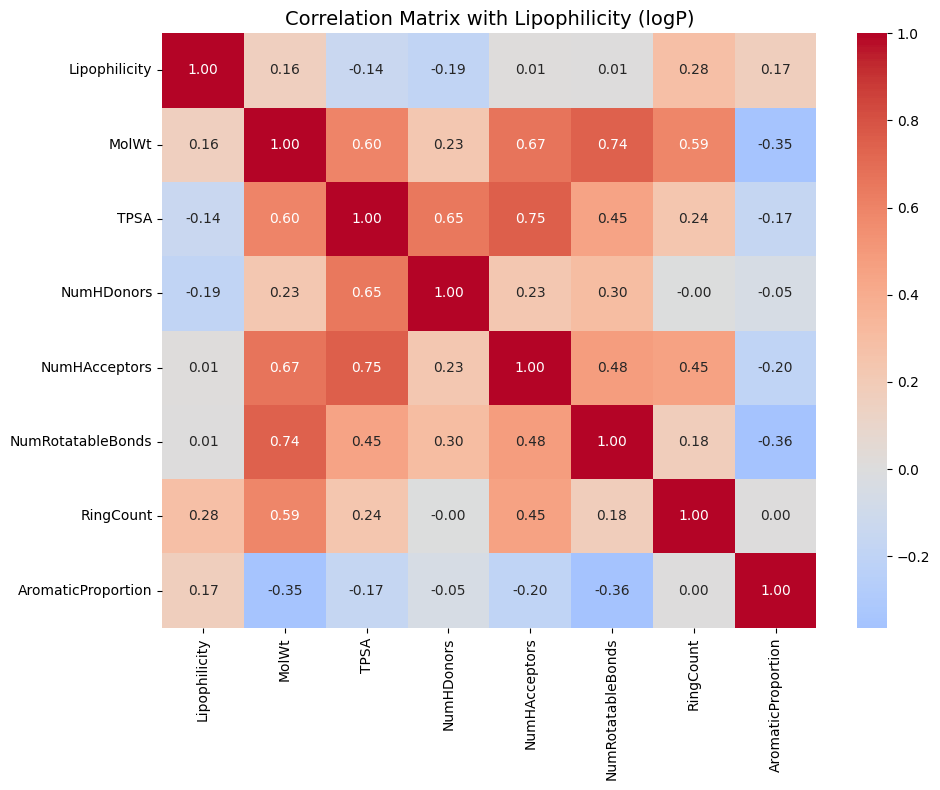

In [11]:
# Set figure size for heatmap visualization
plt.figure(figsize=(10, 8))

# Draw a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

# Add title to the heatmap
plt.title("Correlation Matrix with Lipophilicity (logP)", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

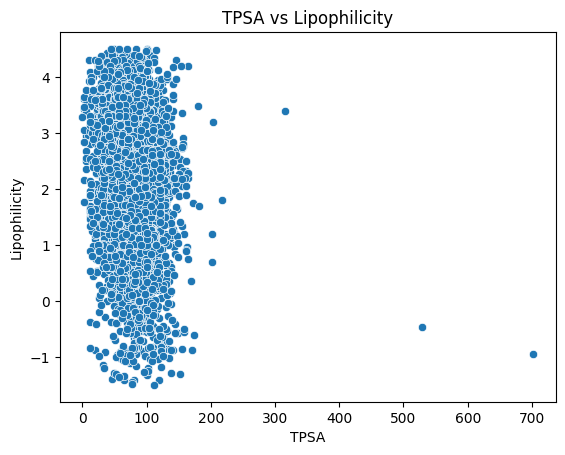

In [12]:
# Example: Scatter plot between TPSA and Lipophilicity (logP)
sns.scatterplot(data=df_full, x="TPSA", y="Lipophilicity")
plt.title("TPSA vs Lipophilicity")
plt.show()

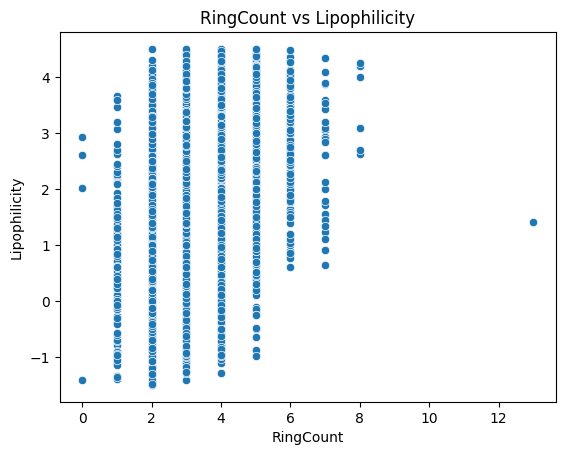

In [13]:
# Example: Scatter plot between ringcount and Lipophilicity (logP)
sns.scatterplot(data=df_full, x="RingCount", y="Lipophilicity")
plt.title("RingCount vs Lipophilicity")
plt.show()

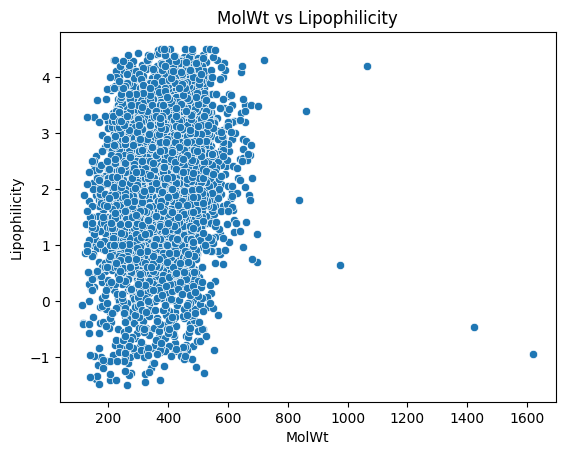

In [14]:
# Example: Scatter plot between MolWt and Lipophilicity (logP)
sns.scatterplot(data=df_full, x="MolWt", y="Lipophilicity")
plt.title("MolWt vs Lipophilicity")
plt.show()

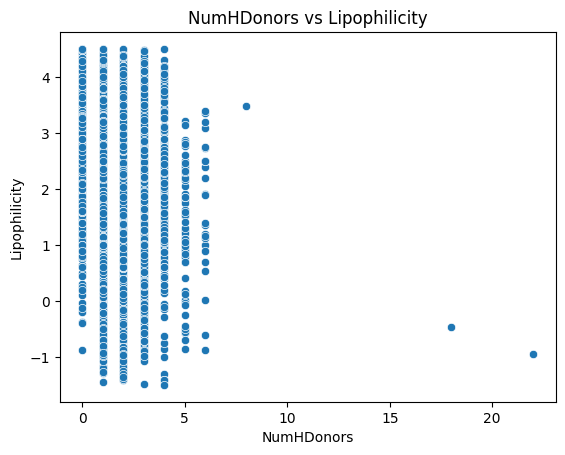

In [15]:
# Example: Scatter plot between NumHDonors and Lipophilicity (logP)
sns.scatterplot(data=df_full, x="NumHDonors", y="Lipophilicity")
plt.title("NumHDonors vs Lipophilicity")
plt.show()

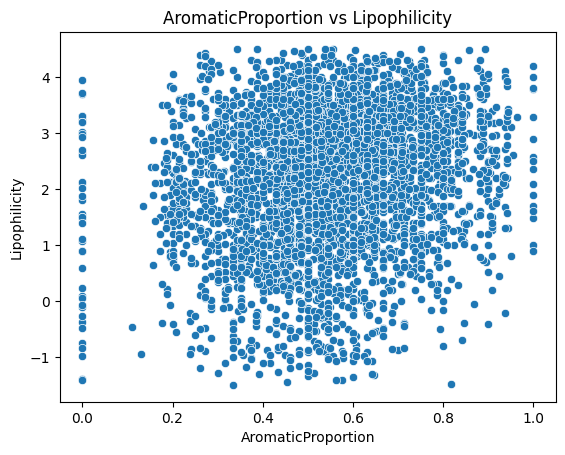

In [16]:
# Example: Scatter plot between AromaticProportion and Lipophilicity (logP)
sns.scatterplot(data=df_full, x="AromaticProportion", y="Lipophilicity")
plt.title("AromaticProportion vs Lipophilicity")
plt.show()

In [17]:
# List of numerical columns to include in the correlation analysis
numeric_cols = ["Lipophilicity", "MolWt", "TPSA", "NumHDonors", "NumHAcceptors",
                "NumRotatableBonds", "RingCount", "AromaticProportion"]

# Compute the correlation matrix
corr_matrix = df_full[numeric_cols].corr()

# Extract correlation values between logP and all other descriptors
logp_corr = corr_matrix["Lipophilicity"].drop("Lipophilicity")

# Sort correlations by absolute value in descending order (strongest relationships at the top)
logp_corr_sorted = logp_corr.reindex(logp_corr.abs().sort_values(ascending=False).index)

# Print sorted correlations
print("Correlation with logP (sorted by absolute value):")
print(logp_corr_sorted)

Correlation with logP (sorted by absolute value):
RingCount             0.281899
NumHDonors           -0.185049
AromaticProportion    0.173502
MolWt                 0.160158
TPSA                 -0.141836
NumHAcceptors         0.013867
NumRotatableBonds     0.007528
Name: Lipophilicity, dtype: float64


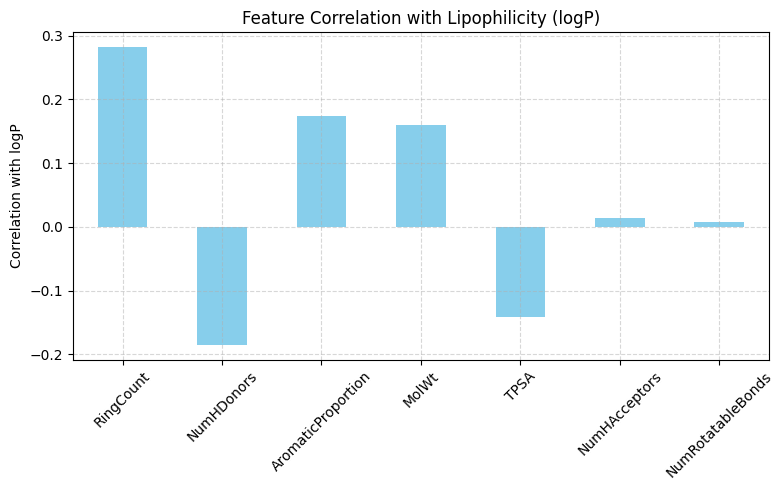

In [18]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8,5))

# Plot sorted correlation values as a bar chart
logp_corr_sorted.plot(kind='bar', color='skyblue')

# Labeling and styling
plt.ylabel("Correlation with logP")
plt.title("Feature Correlation with Lipophilicity (logP)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

[12:27:58] Explicit valence for atom # 5 P, 7, is greater than permitted
[12:27:59] Explicit valence for atom # 29 P, 7, is greater than permitted


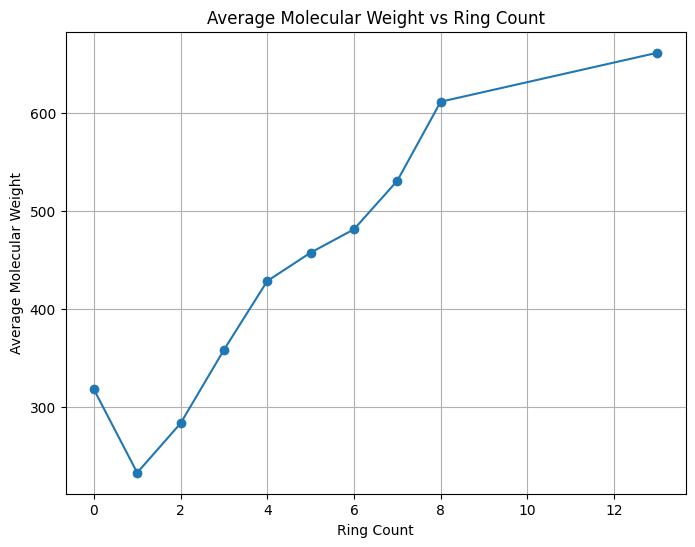

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import matplotlib.pyplot as plt

# 1) Read SMILES strings from the CSV file
df = pd.read_csv('Lipophilicity.csv')

# 2) Convert SMILES strings to RDKit Mol objects
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

# 3) Compute descriptors only if the Mol object is not None
df['MolWt'] = df['Mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol is not None else None)
df['RingCount'] = df['Mol'].apply(lambda mol: mol.GetRingInfo().NumRings() if mol is not None else None)

# 4) Optionally remove rows where Mol object creation failed
df = df[df['Mol'].notnull()].copy()

# 5) Calculate average MolWt for each RingCount group
mean_df = df.groupby('RingCount')['MolWt'].mean().reset_index()

# 6) Plot a line graph
plt.figure(figsize=(8,6))
plt.plot(mean_df['RingCount'], mean_df['MolWt'], marker='o', linestyle='-')
plt.title('Average Molecular Weight vs Ring Count')
plt.xlabel('Ring Count')
plt.ylabel('Average Molecular Weight')
plt.grid(True)
plt.show()

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Lipophilicity.csv")

# Import RDKit libraries for molecular descriptor calculation
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

# Convert SMILES strings to RDKit Mol objects
df["Mol"] = df["SMILES"].apply(Chem.MolFromSmiles)

# Calculate molecular descriptors only if Mol object is not None
df["MolWt"] = df["Mol"].apply(lambda mol: Descriptors.MolWt(mol) if mol is not None else None)
df["TPSA"] = df["Mol"].apply(lambda mol: rdMolDescriptors.CalcTPSA(mol) if mol is not None else None)
df["NumHDonors"] = df["Mol"].apply(lambda mol: rdMolDescriptors.CalcNumHBD(mol) if mol is not None else None)
df["NumHAcceptors"] = df["Mol"].apply(lambda mol: rdMolDescriptors.CalcNumHBA(mol) if mol is not None else None)
df["NumRotatableBonds"] = df["Mol"].apply(lambda mol: Descriptors.NumRotatableBonds(mol) if mol is not None else None)
df["RingCount"] = df["Mol"].apply(lambda mol: mol.GetRingInfo().NumRings() if mol is not None else None)
df["AromaticProportion"] = df["Mol"].apply(
    lambda mol: len([atom for atom in mol.GetAromaticAtoms()]) / mol.GetNumAtoms()
    if mol is not None else None
)

# Remove rows with missing values (use only complete feature sets)
df = df.dropna(subset=["MolWt", "TPSA", "NumHDonors", "NumHAcceptors",
                       "NumRotatableBonds", "RingCount", "AromaticProportion", "Lipophilicity"])

# Define input features and target variable
X = df[["MolWt", "TPSA", "NumHDonors", "NumHAcceptors",
        "NumRotatableBonds", "RingCount", "AromaticProportion"]]  # input features
y = df["Lipophilicity"]  # target: measured lipophilicity (logP)

# Split the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error (MSE):", round(mse, 4))
print("R² Score (R-squared):", round(r2, 4))

# Print regression coefficients to see the influence of each feature
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nFeature importance (by absolute coefficient):")
print(coeff_df)

[12:28:03] Explicit valence for atom # 5 P, 7, is greater than permitted
[12:28:05] Explicit valence for atom # 29 P, 7, is greater than permitted


Mean Squared Error (MSE): 1.3207
R² Score (R-squared): 0.2088

Feature importance (by absolute coefficient):
              Feature  Coefficient
6  AromaticProportion     1.690330
5           RingCount     0.067391
4   NumRotatableBonds    -0.058969
3       NumHAcceptors     0.042253
1                TPSA    -0.014603
0               MolWt     0.005596
2          NumHDonors    -0.001654


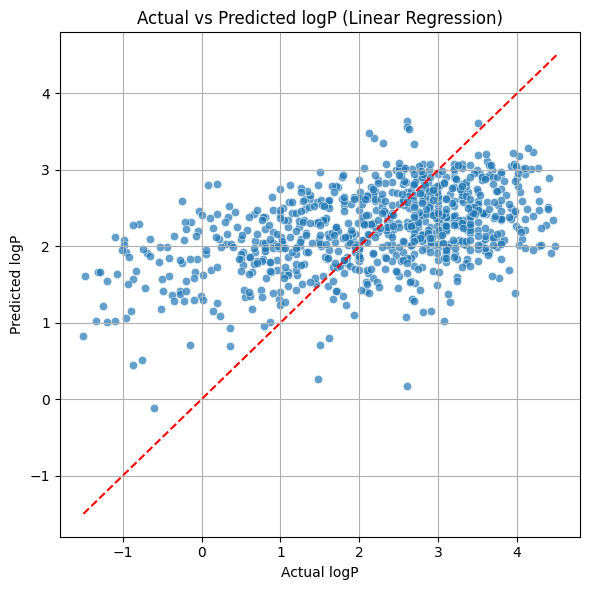

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set figure size (6x6 inches)
plt.figure(figsize=(6,6))

# 2. Plot actual (y_test) vs predicted (y_pred) values as a scatter plot
# alpha=0.7 → Adjust transparency to show overlapping points more clearly
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# 3. Red dashed line: reference line for perfect prediction (y = x)
# If actual and predicted values are equal, all points will lie on this line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

# 4. Set axis labels and plot title
plt.xlabel("Actual logP")   # x-axis: experimentally measured logP
plt.ylabel("Predicted logP")  # y-axis: logP predicted by the model
plt.title("Actual vs Predicted logP (Linear Regression)")

# 5. Add grid and adjust layout
plt.grid(True)         # 배경에 격자선 추가
plt.tight_layout()     # 그래프 내부 여백 자동 조정

# 6. Display the plot
plt.show()

In [22]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define the model
# - n_estimators: number of trees (100 is usually sufficient)
# - random_state: fixed for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# 4. Evaluate model performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# 5. Print evaluation results
print("Random Forest Regressor Results")
print("MSE:", round(rf_mse, 4))
print("R² Score:", round(rf_r2, 4))

# 6. Print feature importance scores
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\\nFeature Importance:")
print(feature_importance)

Random Forest Regressor Results
MSE: 0.8693
R² Score: 0.4792
\nFeature Importance:
              Feature  Importance
1                TPSA    0.243022
0               MolWt    0.230470
6  AromaticProportion    0.179854
5           RingCount    0.125864
4   NumRotatableBonds    0.079620
2          NumHDonors    0.073882
3       NumHAcceptors    0.067288


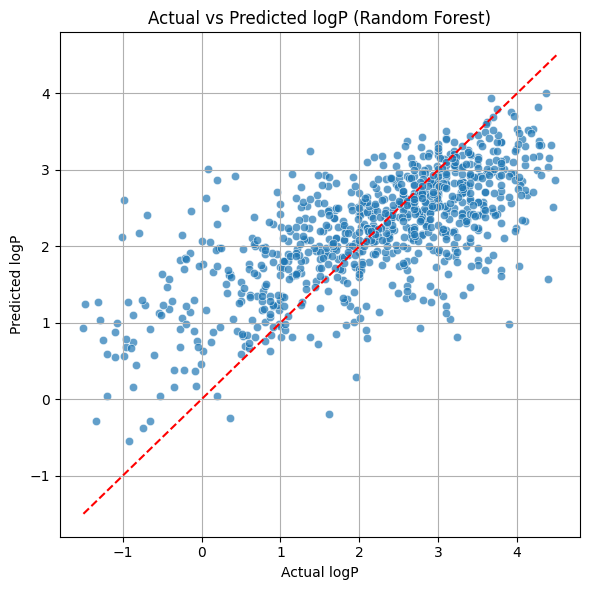

In [23]:
plt.figure(figsize=(6,6))  # 1. Set the figure size (6x6 inches)

# 2. Plot a scatter plot of actual logP (y_test) vs predicted logP (rf_pred)
# alpha=0.7 → Add transparency to help visualize overlapping points
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)

# 3. Add a diagonal reference line for perfect prediction (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

# 4. Set axis labels
plt.xlabel("Actual logP")      # Actual measured values
plt.ylabel("Predicted logP")   # Predicted values from the model

# 5. Set the plot title
plt.title("Actual vs Predicted logP (Random Forest)")

# 6. Add grid and adjust layout
plt.grid(True)
plt.tight_layout()

# 7. Display the plot
plt.show()

In [24]:
# Import required libraries
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SVR is sensitive to feature scaling, so use it with StandardScaler in a pipeline
# Define a nonlinear SVR model using the RBF kernel
svr = make_pipeline(
    StandardScaler(),         # Standardize input features (mean=0, std=1)
    SVR(kernel='rbf',         # Use RBF kernel (suitable for nonlinear regression)
        C=1.0,                # Regularization strength (higher values increase risk of overfitting)
        epsilon=0.1)          # Margin of tolerance for errors
)

# Train the model using the training data
svr.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_svr = svr.predict(X_test)

# Calculate model evaluation metrics (MSE, R²)
from sklearn.metrics import mean_squared_error, r2_score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print evaluation results
print("🔍 SVR Model Evaluation")
print("Mean Squared Error (MSE):", round(mse_svr, 4))
print("R² Score:", round(r2_svr, 4))

plt.show()

🔍 SVR Model Evaluation
Mean Squared Error (MSE): 1.0702
R² Score: 0.3588


/tmp/ipython-input-25-3492266952.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


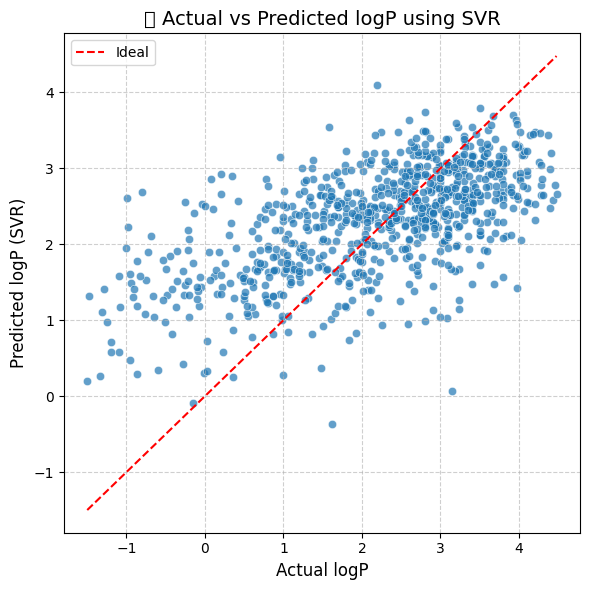

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(6,6))

# Plot a scatter plot of actual (y_test) vs predicted (y_pred_svr) values
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.7)

# Plot the ideal prediction line (predicted = actual) on the diagonal (red dashed line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')

# Add axis labels and plot title
plt.xlabel("Actual logP", fontsize=12)
plt.ylabel("Predicted logP (SVR)", fontsize=12)
plt.title("📊 Actual vs Predicted logP using SVR", fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Use only TPSA as the input feature
X = df[["TPSA"]]
y = df["Lipophilicity"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR (RBF kernel)": make_pipeline(StandardScaler(), SVR(kernel="rbf"))
}

# Compare model performance
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MSE": round(mse, 4),
        "R²": round(r2, 4)
    })

# Summarize results
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("📊 Performance Comparison Using TPSA Only")
print(results_df)


📊 Performance Comparison Using TPSA Only
               Model     MSE      R²
1      Random Forest  1.5536  0.0436
0  Linear Regression  1.5907  0.0209
2   SVR (RBF kernel)  1.6166  0.0049
